<center><H2> Assignment 2 - Unsupervised Learning </H2></center><br/>
<center><H2> Student Id: 2021AIML064 </H2></center><br/>
<center><H2> Hierarchical Clustering </H2></center><br/>

**Your task in this assignment is to:**

1. Understand the two datasets provided and combine them in a meaningful way to make one dataset with useful features [1 mark]

2. Do appropriate EDA and preprocessing on the dataset you formed in part 1 [2 mark]

3. Cluster the data using Agglomerative clustering and find the appropriate number of clusters for the data using dendrogram [2 marks]

3. After finding the best clustering obtained for your data, try to interpret some/all of the clusters and derive some domain-specific insights out of the results [1 mark]

**Data: post_details.csv Download post_details.csv &post_reaction_details.csv**

In [1]:
# Import libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # for Data visualization
%matplotlib inline
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
import seaborn as sns

<left><h1>  1. Understand the two datasets provided and combine them in a meaningful way to make one dataset with useful features [1 mark] </h1></left>

In [2]:
## Import Data

# Read data from csv file
post_details = pd.read_csv('post_details.csv')
post_details.head()


,status_id,status_type,status_published,num_reactions,num_comments,num_shares
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0


In [3]:
post_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6997 entries, 0 to 6996
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         6997 non-null   object
 1   status_type       6997 non-null   object
 2   status_published  6997 non-null   object
 3   num_reactions     6997 non-null   int64 
 4   num_comments      6997 non-null   int64 
 5   num_shares        6997 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 328.1+ KB


In [4]:
# Read 2nd data set

post_reaction_details = pd.read_csv('post_reaction_details.csv')
post_reaction_details.head()

,status_id,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,432,92,3,1,1,0
1,246675545449582_1649426988507757,150,0,0,0,0,0
2,246675545449582_1648730588577397,204,21,1,1,0,0
3,246675545449582_1648576705259452,111,0,0,0,0,0
4,246675545449582_1645700502213739,204,9,0,0,0,0


In [5]:
post_reaction_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6997 entries, 0 to 6996
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   status_id   6997 non-null   object
 1   num_likes   6997 non-null   int64 
 2   num_loves   6997 non-null   int64 
 3   num_wows    6997 non-null   int64 
 4   num_hahas   6997 non-null   int64 
 5   num_sads    6997 non-null   int64 
 6   num_angrys  6997 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 382.8+ KB


### Combining both data sets based on common join column Status Id

In [6]:
fbposts = pd.merge(post_details, post_reaction_details, on='status_id')

In [7]:
fbposts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6997 entries, 0 to 6996
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         6997 non-null   object
 1   status_type       6997 non-null   object
 2   status_published  6997 non-null   object
 3   num_reactions     6997 non-null   int64 
 4   num_comments      6997 non-null   int64 
 5   num_shares        6997 non-null   int64 
 6   num_likes         6997 non-null   int64 
 7   num_loves         6997 non-null   int64 
 8   num_wows          6997 non-null   int64 
 9   num_hahas         6997 non-null   int64 
 10  num_sads          6997 non-null   int64 
 11  num_angrys        6997 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 710.6+ KB


In [8]:
fbposts.head(10)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0
5,246675545449582_1645650162218773,photo,4/18/2018 2:14,217,6,0,211,5,1,0,0,0
6,246675545449582_1645564175560705,video,4/18/2018 0:24,503,614,72,418,70,10,2,0,3
7,246675545449582_1644824665634656,video,4/17/2018 7:42,295,453,53,260,32,1,1,0,1
8,246675545449582_1644655795651543,photo,4/17/2018 3:33,203,1,0,198,5,0,0,0,0
9,246675545449582_1638788379571618,photo,4/11/2018 4:53,170,9,1,167,3,0,0,0,0


<left><h2> 2. Do appropriate EDA and preprocessing on the dataset you formed in part 1 [2 marks] </h2></left>

In [9]:
#check uniquesness
fbposts.nunique()

status_id           6997
status_type            4
status_published    6911
num_reactions       1067
num_comments         993
num_shares           501
num_likes           1044
num_loves            229
num_wows              65
num_hahas             42
num_sads              24
num_angrys            14
dtype: int64

In [10]:
## check duplicates

duplicated_data = fbposts[fbposts['status_id'].duplicated() ==True]


In [11]:
# print head of duplicated data

duplicated_data.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys


**There are no duplicates from comibined dataset**

In [12]:
# Check for missing values

fbposts.isnull().sum()

status_id           0
status_type         0
status_published    0
num_reactions       0
num_comments        0
num_shares          0
num_likes           0
num_loves           0
num_wows            0
num_hahas           0
num_sads            0
num_angrys          0
dtype: int64

**No Missing values from combine dataset** 

## Futher Data Claenup and Proprocessing

**We have individual reactions and num_reactions from dataset. In ideal case all individual reactions should be summed up to num_reactions. so checking if the data is clean or not by comparing all reactions vs num_reactions**


In [13]:

fbposts['all_reaction_count'] = fbposts.iloc[:,-6:].sum(axis=1)

In [14]:
fbposts['reaction_match'] = fbposts.apply(lambda x: x['num_reactions'] == x['all_reaction_count'],axis=1)

In [15]:
data_react_mismatch = fbposts[fbposts.reaction_match == False]
data_react_mismatch.shape

(9, 14)

**There are 9 records not matching with num of actions with manlually calculated All reactions.
These need to be corrected**

In [16]:
fbposts.num_reactions = fbposts.all_reaction_count

In [17]:
fbposts['reaction_match'] = fbposts.apply(lambda x: x['num_reactions'] == x['all_reaction_count'],axis=1)

In [18]:
data_react_mismatch = fbposts[fbposts.reaction_match == False]
data_react_mismatch.shape

(0, 14)

In [19]:
fbposts['react_comment_r'] = fbposts.num_reactions/fbposts.num_comments
fbposts['react_share_r'] =fbposts.num_reactions/fbposts.num_shares

## Feature Engneering to extract new features
###  Given Data set is FB reactions for posts . 
**For every post , Reactions can be categorized as Positive and negative reactions, so that we can reduce features. As all positive reactions interpret the  the same insights from individual reactions like, likes, loves Wow, haha etc Similarly All negative reactions provide same insights.**


In [20]:
fbposts['postive_reactions'] = fbposts.iloc[:,-10:-7].sum(axis=1)
fbposts.head(2)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,all_reaction_count,reaction_match,react_comment_r,react_share_r,postive_reactions
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,529,True,1.033203,2.019084,527
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,150,True,inf,inf,150


In [21]:
fbposts['negative_reactions'] = fbposts.iloc[:,-8:-5].sum(axis=1)
fbposts.head(2)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,all_reaction_count,reaction_match,react_comment_r,react_share_r,postive_reactions,negative_reactions
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,529,True,1.033203,2.019084,527,2
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,150,True,inf,inf,150,0


In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

fbposts['status_type'] = le.fit_transform(fbposts['status_type'])

In [23]:
fbposts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6997 entries, 0 to 6996
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   status_id           6997 non-null   object 
 1   status_type         6997 non-null   int32  
 2   status_published    6997 non-null   object 
 3   num_reactions       6997 non-null   int64  
 4   num_comments        6997 non-null   int64  
 5   num_shares          6997 non-null   int64  
 6   num_likes           6997 non-null   int64  
 7   num_loves           6997 non-null   int64  
 8   num_wows            6997 non-null   int64  
 9   num_hahas           6997 non-null   int64  
 10  num_sads            6997 non-null   int64  
 11  num_angrys          6997 non-null   int64  
 12  all_reaction_count  6997 non-null   int64  
 13  reaction_match      6997 non-null   bool   
 14  react_comment_r     6877 non-null   float64
 15  react_share_r       6880 non-null   float64
 16  postiv

In [24]:
fbposts.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,all_reaction_count,reaction_match,react_comment_r,react_share_r,postive_reactions,negative_reactions
0,246675545449582_1649696485147474,3,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,529,True,1.033203,2.019084,527,2
1,246675545449582_1649426988507757,1,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,150,True,inf,inf,150,0
2,246675545449582_1648730588577397,3,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,227,True,0.961864,3.982456,226,1
3,246675545449582_1648576705259452,1,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,111,True,inf,inf,111,0
4,246675545449582_1645700502213739,1,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,213,True,inf,inf,213,0


**Drop non numerical columsn from dataset as they are not useful in model building**

In [25]:
# drop unnecessary columns from dataset
fbposts = fbposts.drop(['status_published','reaction_match','react_comment_r','react_share_r','status_id','all_reaction_count'],axis=1)

In [26]:
fbposts.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,postive_reactions,negative_reactions
0,3,529,512,262,432,92,3,1,1,0,527,2
1,1,150,0,0,150,0,0,0,0,0,150,0
2,3,227,236,57,204,21,1,1,0,0,226,1
3,1,111,0,0,111,0,0,0,0,0,111,0
4,1,213,0,0,204,9,0,0,0,0,213,0


<AxesSubplot:>

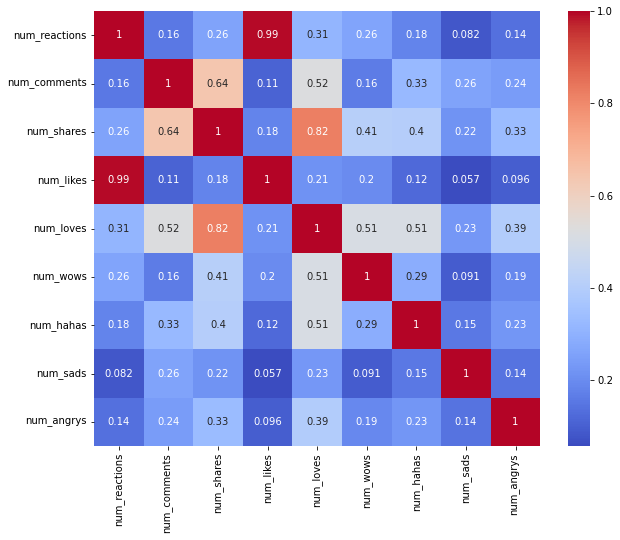

In [27]:
# heatmap to show the relational between features
f, ax = plt.subplots(figsize=(10, 8))
newdf=fbposts.iloc[:,1:10]
corr = newdf.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)

**From above Num_reactions are highly Corrlated to num_likes 
and num_shares are corrleated with num_wows**

**Another Correlation map with useful features for Model Building**

<AxesSubplot:>

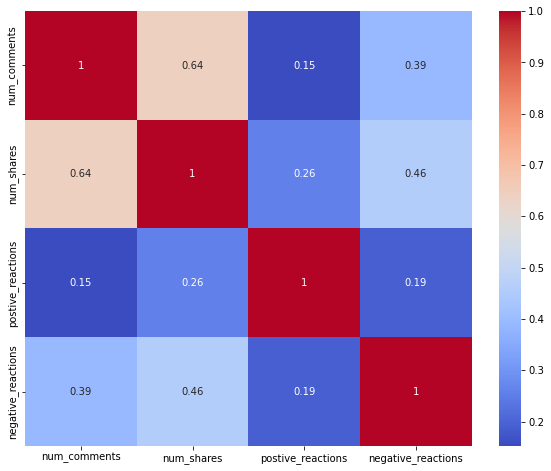

In [28]:
# heatmap to show the relational between features
f, ax = plt.subplots(figsize=(10, 8))
newdf=fbposts[['num_comments','num_shares','postive_reactions','negative_reactions']]
corr = newdf.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)

<center><h1> Plotting Graphs  </h1></center>


[Text(0.5, 0, 'Status Type'), Text(0, 0.5, 'Count')]

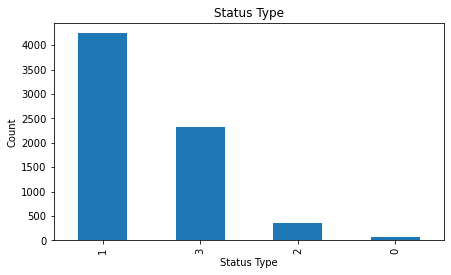

In [29]:
statustype_ax = fbposts.status_type.value_counts().plot(kind='bar',  figsize=(7,4),title="Status Type")

statustype_ax.set(xlabel="Status Type", ylabel="Count")

**majority data belongs photos . so foucs should be on statsus type Photos**

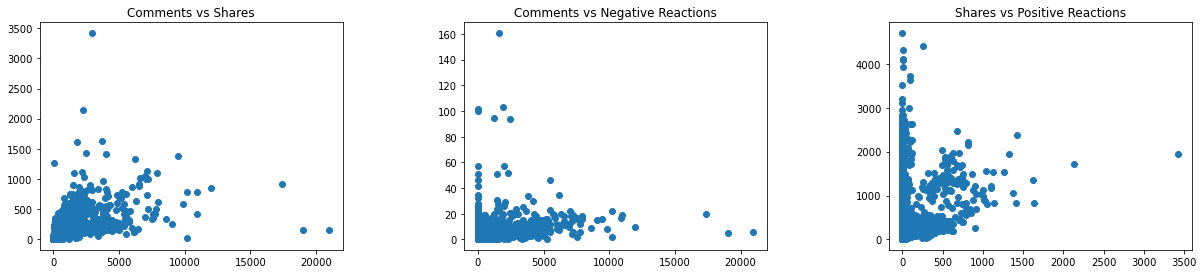

In [30]:
plt.figure(figsize=(20,15))

plt.subplot(331)
plt.scatter(fbposts['num_comments'],fbposts['num_shares'])
plt.title('Comments vs Shares')

plt.subplot(332)
plt.scatter(fbposts['num_comments'],fbposts['negative_reactions'])
plt.title('Comments vs Negative Reactions')

plt.subplot(333)
plt.scatter(fbposts['num_shares'],fbposts['postive_reactions'])
plt.title('Shares vs Positive Reactions')


#plt.tight_layout()
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()


Insights from Graphs
-------------------------------
******************************************************************************************************************
**Photo posts is the predominant class followed by video.  
No of shares  are increasing with  no of comments.  
Negative Recations are no good patter with comments.  
Posts with good number of share have high positive reactions.** 
******************************************************************************************************************

## EDA Final Notes
**1.There are no missing values    
2. No duplciates identified     
3. Reactions counts are slightly missing with total reaction counts . Fixed this problem  
4. From Reactions columns, Categorized them into positive and Negative reactions to reduce features and aswell for better grouping of cluster points.  
5. Photo posts is the predominant class followed by video  
6. Considering 'num_comments','num_shares','postive_reactions','negative_reactions' for Clustring.**

<left><h1> 3. Cluster the data using Agglomerative clustering and find the appropriate number of clusters for the data using dendrogram [2 marks] </h1></left>

### We will build algorithm with original variables given in data set and also build with identified features after EDA to compare the algorithm with best silhoute scores

In [31]:
M1=fbposts.iloc[:,1:10]
M1.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,529,512,262,432,92,3,1,1,0
1,150,0,0,150,0,0,0,0,0
2,227,236,57,204,21,1,1,0,0
3,111,0,0,111,0,0,0,0,0
4,213,0,0,204,9,0,0,0,0


In [32]:
# scaling 
from sklearn.preprocessing import MinMaxScaler,StandardScaler,normalize
#scaler = MinMaxScaler() 
# To scale data 
sc = StandardScaler()
data_scaled1 = sc.fit_transform(M1)
data_scaled1 = normalize(data_scaled1)
data_scaled1 = pd.DataFrame(data_scaled1, columns = list(M1.columns))
print(data_scaled1)

      num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
0          0.239286      0.114332    0.598468   0.180093   0.704203  0.071347   
1         -0.259799     -0.396717   -0.478736  -0.213930  -0.499242 -0.225467   
2          0.013321      0.034224    0.372715  -0.039487   0.604744 -0.085381   
3         -0.365552     -0.367155   -0.443062  -0.326896  -0.462041 -0.208666   
4         -0.050936     -0.487859   -0.588722  -0.025912  -0.180746 -0.277267   
...             ...           ...         ...        ...        ...       ...   
6992      -0.414066     -0.348581   -0.420648  -0.379397  -0.438666 -0.198110   
6993      -0.539648     -0.295584   -0.356695  -0.521291  -0.342811 -0.167990   
6994      -0.546044     -0.280306   -0.338258  -0.527153  -0.325092 -0.159308   
6995       0.425572     -0.365849   -0.211549   0.483873  -0.410016 -0.219605   
6996      -0.525579     -0.289262   -0.349066  -0.502330  -0.364018 -0.164397   

      num_hahas  num_sads  

In [33]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
import seaborn as sns
import scipy.cluster.hierarchy as sch

Plot the dendrograms for the above scaled dataset points. (hint: use scipy.cluster.hierarchy imported above). 
Plot using the following parameters:
1. ward
2. complete
3. average <br> 
Study the dendrograms and comment on the major differences between them.

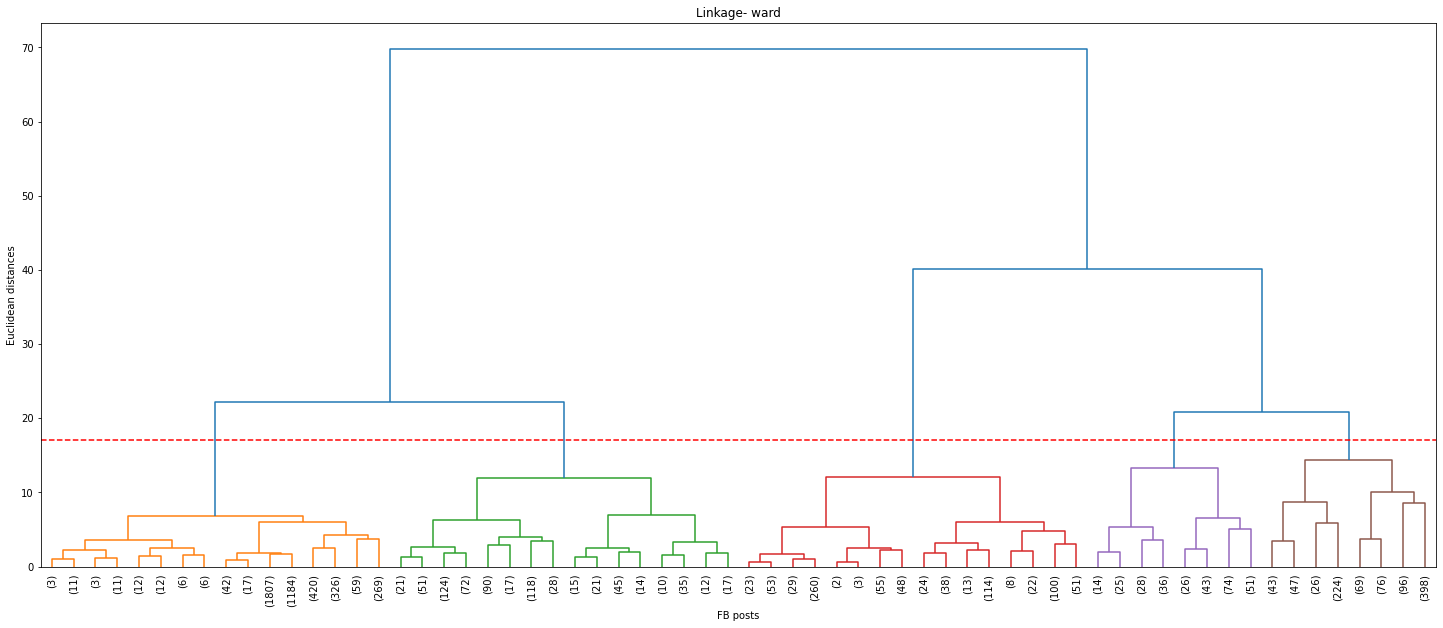

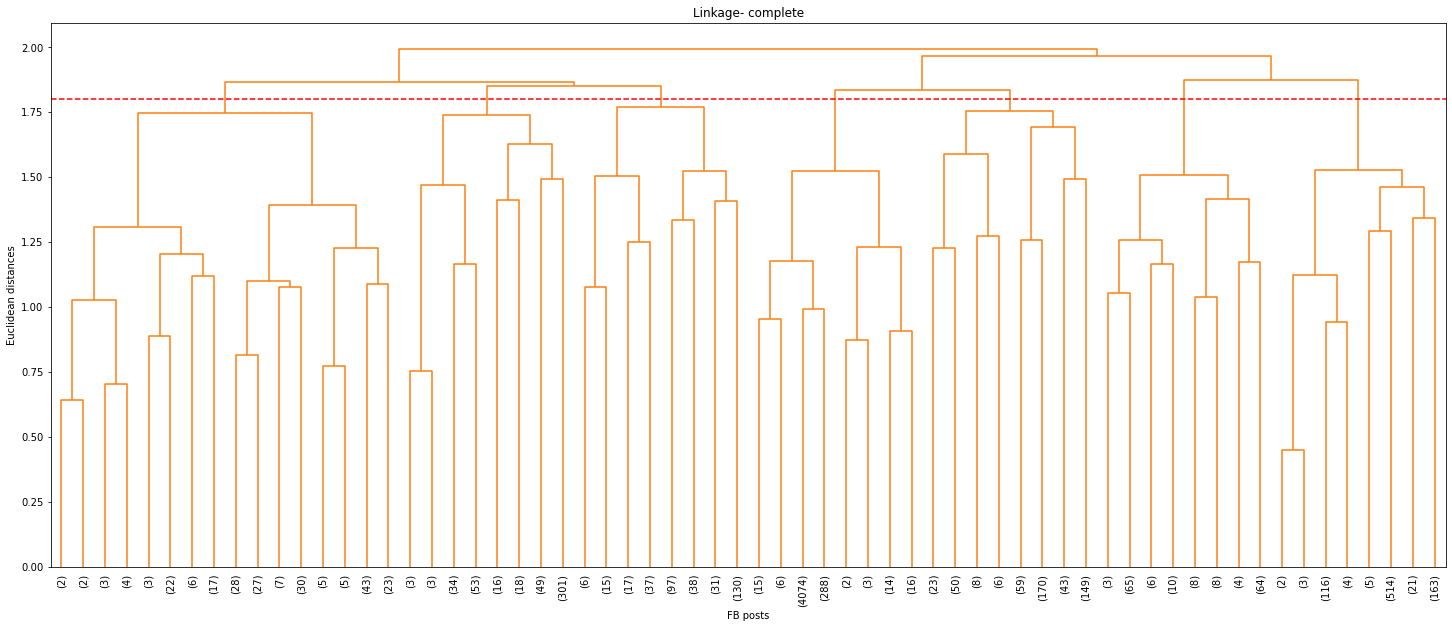

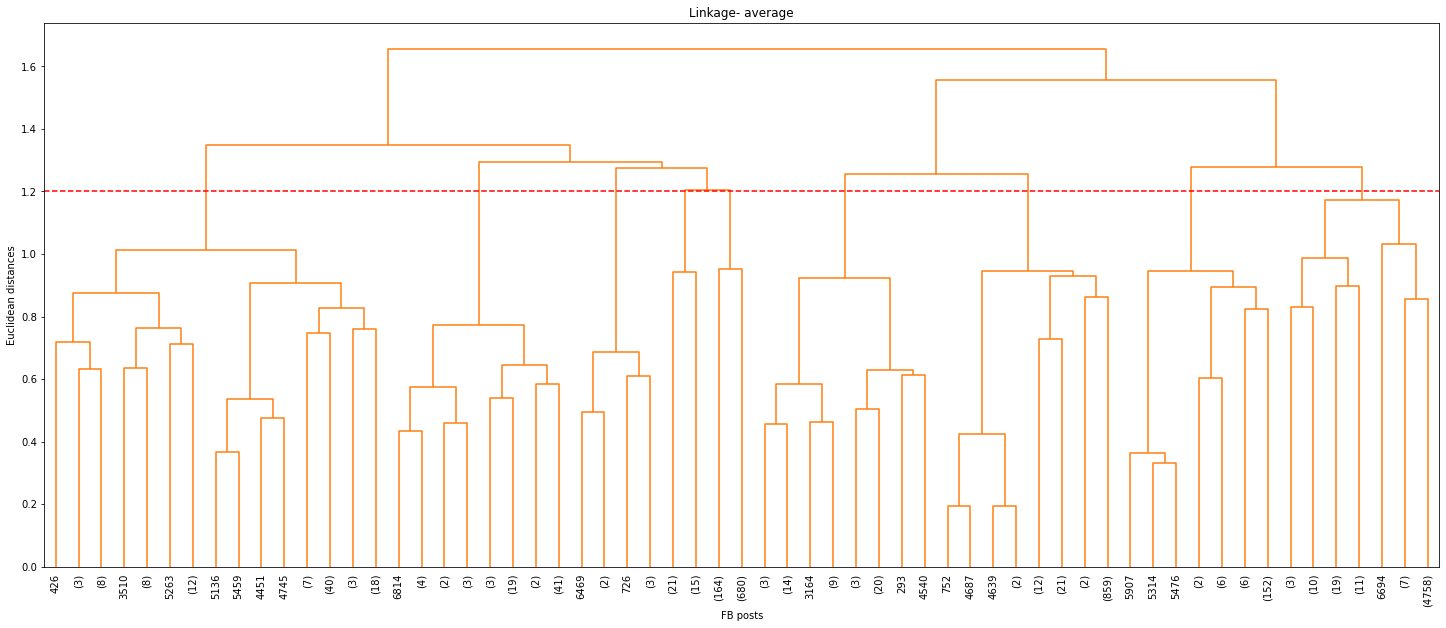

In [34]:
# dendrograms 
# tuple of linkages and suitable cutting height based on exploratory analysis
linkages = (('ward', 17), ('complete', 1.8 ), ('average', 1.2))

for (linkage, cut_height) in linkages:
    Z = sch.linkage(data_scaled1, method  = linkage)
    plt.figure(figsize=(25,10))
    sch.dendrogram(Z, leaf_rotation=90, p=5,color_threshold=20, leaf_font_size=10, truncate_mode='level')
    plt.axhline(y = cut_height, color = 'r', linestyle = 'dashed')
    plt.title('Linkage- ' + linkage)
    plt.xlabel('FB posts')
    plt.ylabel('Euclidean distances')
    plt.show()

#### **Major differences between the 3 dendrograms**
- Ward linkage suggests a clear 2 clusters.
- Complete linkage suggests 3 clusters
- Average linkage suggests 2 clusters.

With the help of dendrograms obtained above, choose a suitable **k** for each linkage type. Experiment with different distance measures as mentioned below: <br>
1. Euclidean 
2. Manhattan 
3. Cosine <br> 
Calculate the cluster quality for each case and report your results in an organized, tabular format. The table should have the parameters used, cluster means and cluster quality.

In [35]:
# clustering (hint: Use AgglomerativeClustering imported above)

from sklearn.metrics import  silhouette_score
from sklearn.neighbors import NearestCentroid

# tuple of linkage type and the suitaable cluster count (k) obtained from the dendrograms
linkages = (('ward', 2), ('complete', 3), ('average', 2))

results = []

for (linkage, k) in linkages: 
    
    # euclidean distance measure
    euclidean = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage=linkage)
    y_predict = euclidean.fit_predict(data_scaled1)
    silhouette_avg = silhouette_score(data_scaled1, euclidean.labels_)
    
    # get centroids (Cluster means)
    clf = NearestCentroid()
    clf.fit(data_scaled1, y_predict)    
    for idx, centroid in enumerate(clf.centroids_):
            results.append((linkage, k, 'euclidean', idx+1, silhouette_avg) + tuple(centroid))  
            
    if(linkage != 'ward') :
        
        # manhattan distance measure
        manhattan = AgglomerativeClustering(n_clusters=k, affinity='manhattan', linkage=linkage)
        manhattan.fit(data_scaled1)
        silhouette_avg = silhouette_score(data_scaled1, manhattan.labels_)
        
        # get centroids (Cluster means)
        clf = NearestCentroid()
        clf.fit(data_scaled1, y_predict)    
        for idx, centroid in enumerate(clf.centroids_):
                results.append((linkage, k, 'manhattan', idx+1, silhouette_avg) + tuple(centroid))  
        
        # cosine distance measure
        cosine = AgglomerativeClustering(n_clusters=k, affinity='cosine', linkage=linkage)
        cosine.fit(data_scaled1)
        silhouette_avg = silhouette_score(data_scaled1, cosine.labels_)
        
        # get centroids (Cluster means)
        clf = NearestCentroid()
        clf.fit(data_scaled1, y_predict)    
        for idx, centroid in enumerate(clf.centroids_):
                results.append((linkage, k, 'cosine', idx+1, silhouette_avg) + tuple(centroid))  

# add cluser means for each column to the table
df = pd.DataFrame(results, columns =['Linkage', 'Cluster count', 'Distance measure', 'Cluster no.', 'Silhouette score'] + list(M1.columns)) 

# display parameters used, cluster quality, and cluster means
display( df )

,Linkage,Cluster count,Distance measure,Cluster no.,Silhouette score,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,ward,2,euclidean,1,0.624625,0.213075,0.076306,0.107986,0.206501,0.134968,0.008928,0.045226,0.035018,0.010592
1,ward,2,euclidean,2,0.624625,-0.447110,-0.307405,-0.369214,-0.421323,-0.369526,-0.135990,-0.214176,-0.200455,-0.204239
2,complete,3,euclidean,1,0.657044,0.450912,-0.138705,-0.181361,0.479615,-0.153467,-0.003593,-0.102004,0.042249,-0.110375
3,complete,3,euclidean,2,0.657044,0.004534,0.287329,0.409616,-0.036162,0.424087,0.018839,0.157759,0.038726,0.132152
4,complete,3,euclidean,3,0.657044,-0.443256,-0.306244,-0.371885,-0.417470,-0.369385,-0.134209,-0.206437,-0.200432,-0.204215
5,complete,3,manhattan,1,0.365929,0.450912,-0.138705,-0.181361,0.479615,-0.153467,-0.003593,-0.102004,0.042249,-0.110375
6,complete,3,manhattan,2,0.365929,0.004534,0.287329,0.409616,-0.036162,0.424087,0.018839,0.157759,0.038726,0.132152
7,complete,3,manhattan,3,0.365929,-0.443256,-0.306244,-0.371885,-0.417470,-0.369385,-0.134209,-0.206437,-0.200432,-0.204215
8,complete,3,cosine,1,0.657044,0.450912,-0.138705,-0.181361,0.479615,-0.153467,-0.003593,-0.102004,0.042249,-0.110375
9,complete,3,cosine,2,0.657044,0.004534,0.287329,0.409616,-0.036162,0.424087,0.018839,0.157759,0.038726,0.132152


### As Per above Table, Suitable number of cluster is 3 as per Silhouette score(.65) for complete linkage with Euclidian Distanc measure

## We will build alogirithm with features identifief after EDA to compare silhoutte score

In [36]:
M2=fbposts[['num_comments','num_shares','postive_reactions','negative_reactions']]
M2.head()

,num_comments,num_shares,postive_reactions,negative_reactions
0,512,262,527,2
1,0,0,150,0
2,236,57,226,1
3,0,0,111,0
4,0,0,213,0


In [37]:
# scaling 
from sklearn.preprocessing import MinMaxScaler,StandardScaler,normalize
#scaler = MinMaxScaler() 
# To scale data 
sc = StandardScaler()
data_scaled = sc.fit_transform(M2)
data_scaled = normalize(data_scaled)
data_scaled = pd.DataFrame(data_scaled, columns = list(M2.columns))
print(data_scaled)

      num_comments  num_shares  postive_reactions  negative_reactions
0         0.173604    0.908726           0.362916            0.111224
1        -0.523116   -0.631268          -0.338493           -0.461815
2         0.091161    0.992789           0.036266           -0.068882
3        -0.487210   -0.587939          -0.481616           -0.430117
4        -0.555151   -0.669926          -0.053018           -0.490097
...            ...         ...                ...                 ...
6992     -0.464706   -0.560782          -0.548877           -0.410250
6993     -0.415131   -0.500958          -0.759275           -0.014440
6994     -0.377691   -0.455777          -0.733785           -0.333432
6995     -0.528159   -0.305403           0.620693           -0.492460
6996     -0.391717   -0.472703          -0.709593           -0.345814

[6997 rows x 4 columns]


In [38]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
import seaborn as sns
import scipy.cluster.hierarchy as sch

Plot the dendrograms for the above scaled dataset points. (hint: use scipy.cluster.hierarchy imported above). 
Plot using the following parameters:
1. ward
2. complete
3. average <br> 
Study the dendrograms and comment on the major differences between them.

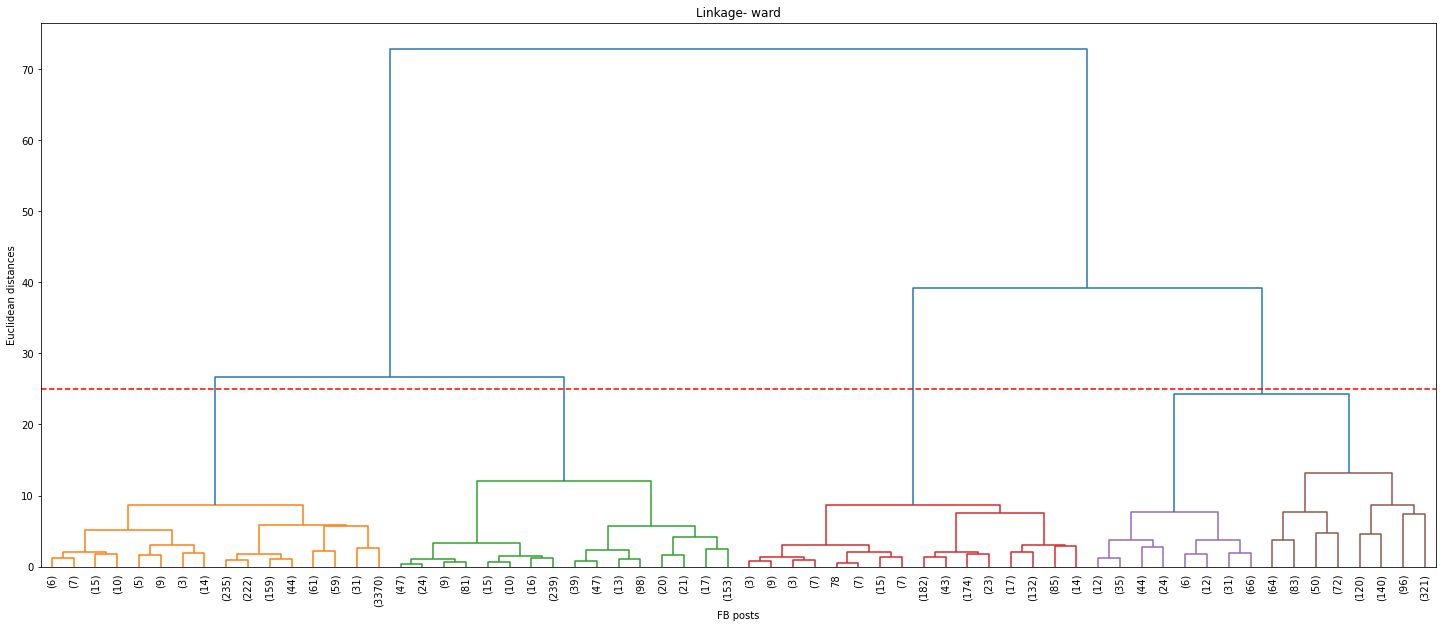

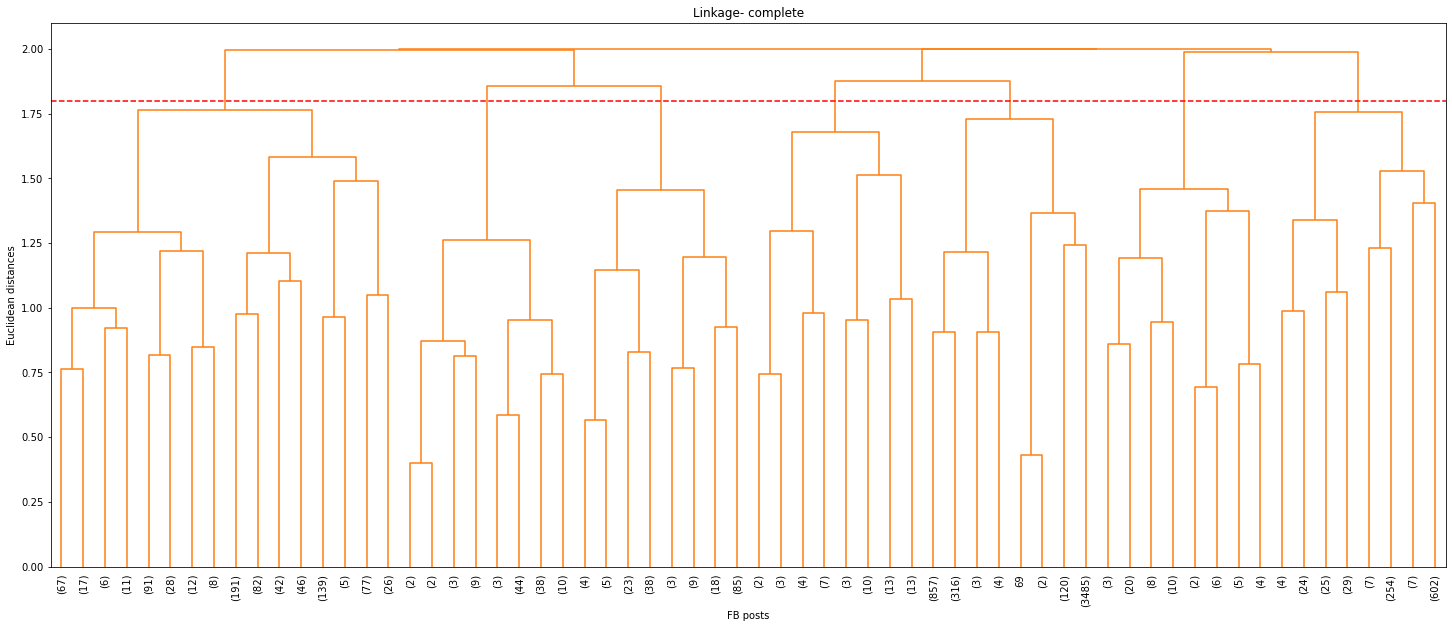

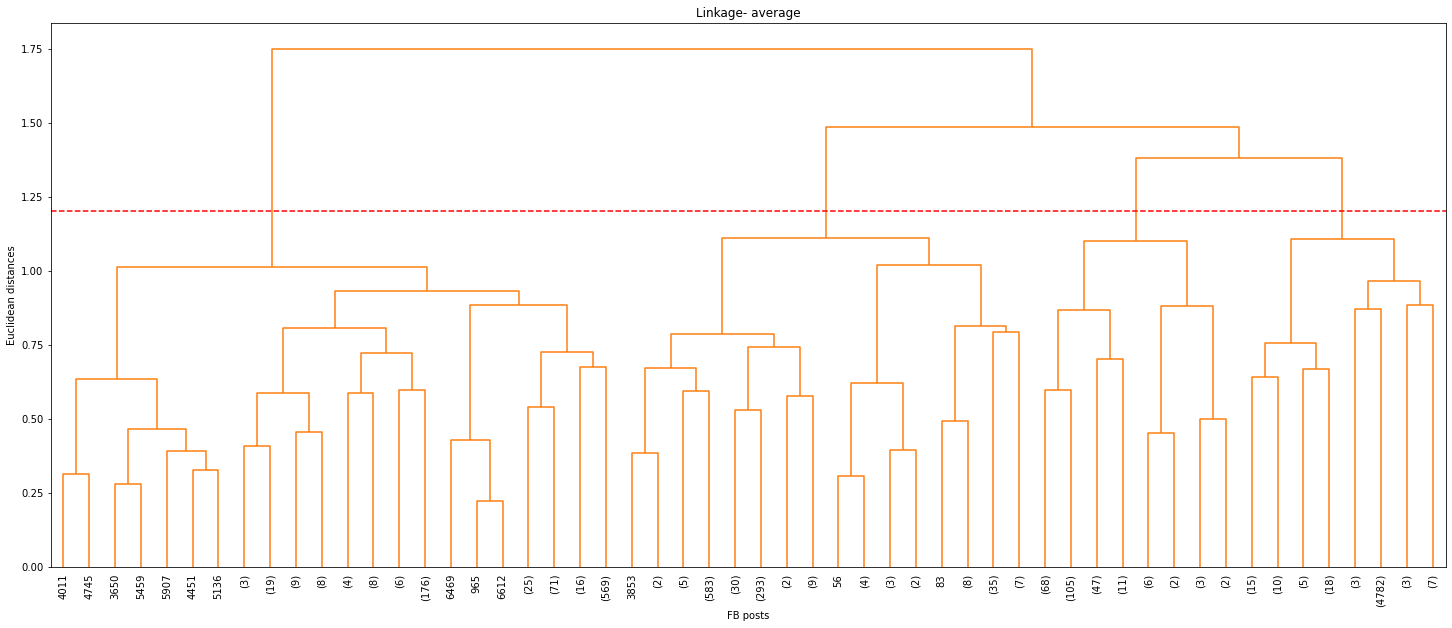

In [39]:
# dendrograms 
# tuple of linkages and suitable cutting height based on exploratory analysis
linkages = (('ward', 25), ('complete', 1.8 ), ('average', 1.2))

for (linkage, cut_height) in linkages:
    Z = sch.linkage(data_scaled, method  = linkage)
    plt.figure(figsize=(25,10))
    sch.dendrogram(Z, leaf_rotation=90, p=5,color_threshold=20, leaf_font_size=10, truncate_mode='level')
    plt.axhline(y = cut_height, color = 'r', linestyle = 'dashed')
    plt.title('Linkage- ' + linkage)
    plt.xlabel('FB posts')
    plt.ylabel('Euclidean distances')
    plt.show()

#### **Major differences between the 3 dendrograms**
- Ward linkage suggests a clear 2 clusters.
- Complete linkage suggests 3 clusters
- Average linkage suggests 2 clusters.

With the help of dendrograms obtained above, choose a suitable **k** for each linkage type. Experiment with different distance measures as mentioned below: <br>
1. Euclidean 
2. Manhattan 
3. Cosine <br> 
Calculate the cluster quality for each case and report your results in an organized, tabular format. The table should have the parameters used, cluster means and cluster quality.

In [40]:
# clustering (hint: Use AgglomerativeClustering imported above)

from sklearn.metrics import  silhouette_score
from sklearn.neighbors import NearestCentroid

# tuple of linkage type and the suitaable cluster count (k) obtained from the dendrograms
linkages = (('ward', 2), ('complete', 3), ('average', 2))

results = []

for (linkage, k) in linkages: 
    
    # euclidean distance measure
    euclidean = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage=linkage)
    y_predict = euclidean.fit_predict(data_scaled)
    silhouette_avg = silhouette_score(data_scaled, euclidean.labels_)
    
    # get centroids (Cluster means)
    clf = NearestCentroid()
    clf.fit(data_scaled, y_predict)    
    for idx, centroid in enumerate(clf.centroids_):
            results.append((linkage, k, 'euclidean', idx+1, silhouette_avg) + tuple(centroid))  
            
    if(linkage != 'ward') :
        
        # manhattan distance measure
        manhattan = AgglomerativeClustering(n_clusters=k, affinity='manhattan', linkage=linkage)
        manhattan.fit(data_scaled)
        silhouette_avg = silhouette_score(data_scaled, manhattan.labels_)
        
        # get centroids (Cluster means)
        clf = NearestCentroid()
        clf.fit(data_scaled, y_predict)    
        for idx, centroid in enumerate(clf.centroids_):
                results.append((linkage, k, 'manhattan', idx+1, silhouette_avg) + tuple(centroid))  
        
        # cosine distance measure
        cosine = AgglomerativeClustering(n_clusters=k, affinity='cosine', linkage=linkage)
        cosine.fit(data_scaled)
        silhouette_avg = silhouette_score(data_scaled, cosine.labels_)
        
        # get centroids (Cluster means)
        clf = NearestCentroid()
        clf.fit(data_scaled, y_predict)    
        for idx, centroid in enumerate(clf.centroids_):
                results.append((linkage, k, 'cosine', idx+1, silhouette_avg) + tuple(centroid))  

# add cluser means for each column to the table
df = pd.DataFrame(results, columns =['Linkage', 'Cluster count', 'Distance measure', 'Cluster no.', 'Silhouette score'] + list(M2.columns)) 

# display parameters used, cluster quality, and cluster means
display( df )

,Linkage,Cluster count,Distance measure,Cluster no.,Silhouette score,num_comments,num_shares,postive_reactions,negative_reactions
0,ward,2,euclidean,1,0.665248,0.155588,0.217266,0.325243,0.159862
1,ward,2,euclidean,2,0.665248,-0.415853,-0.498037,-0.569401,-0.370566
2,complete,3,euclidean,1,0.712177,0.339638,0.498076,-0.020090,0.348977
3,complete,3,euclidean,2,0.712177,-0.211748,-0.306227,0.739908,-0.199415
4,complete,3,euclidean,3,0.712177,-0.412927,-0.493006,-0.621595,-0.368350
5,complete,3,manhattan,1,0.571951,0.339638,0.498076,-0.020090,0.348977
6,complete,3,manhattan,2,0.571951,-0.211748,-0.306227,0.739908,-0.199415
7,complete,3,manhattan,3,0.571951,-0.412927,-0.493006,-0.621595,-0.368350
8,complete,3,cosine,1,0.712177,0.339638,0.498076,-0.020090,0.348977
9,complete,3,cosine,2,0.712177,-0.211748,-0.306227,0.739908,-0.199415


### As Per above Table, Suitable number of cluster is 3 as per Silhouette score(.71) for complete linkage with Euclidian Distance measure

## M2 with 4 features from EDA given best silhoutte score when compared with all features from original dataset. so we will build model with 4 features

<center><h1>Cluster Visualization </h1></center>

## To visualize the clusters, reduce the data to 2 dimensions using PCA. 
**Make a scatterplot with different colours for each cluster obtained.

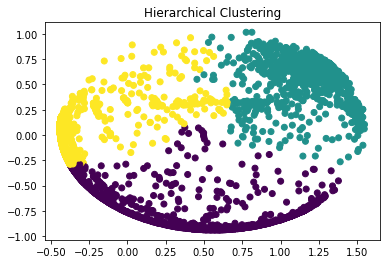

In [41]:
# visualization - reduce to two dimensions using PCA and make a scatterplot 
pca = PCA(n_components = 2) 
principal_components  = pca.fit_transform(data_scaled) 
principalDf  = pd.DataFrame(principal_components) 
principalDf.columns = ['P1', 'P2']

# Hierarchical Clustering
# Suitable number of cluster is 3 as per Silhouette score for complete linkage with Euclidian Distance.
hc = AgglomerativeClustering(n_clusters =3, affinity='euclidean', linkage='complete').fit_predict(principalDf)
plt.scatter(principalDf['P1'], principalDf['P2'], c = hc)
plt.title('Hierarchical Clustering')
plt.show() 


In [42]:
hc1 = AgglomerativeClustering(n_clusters =3, affinity='euclidean', linkage='complete').fit(principalDf)
print('Output Clusters are')
principalDf['cluster'] = hc1.labels_+1
M2['cluster'] = hc1.labels_+1
M2
#print(principalDf.cluster.value_counts())

Output Clusters are


,num_comments,num_shares,postive_reactions,negative_reactions,cluster
0,512,262,527,2,2
1,0,0,150,0,1
2,236,57,226,1,2
3,0,0,111,0,3
4,0,0,213,0,1
...,...,...,...,...,...
6992,0,0,89,0,3
6993,0,0,15,1,3
6994,0,0,2,0,3
6995,12,22,351,0,1


In [44]:
M2['cluster'].value_counts()

3    4539
1    1425
2    1033
Name: cluster, dtype: int64

In [45]:
M2.groupby('cluster')['num_comments', 'num_shares', 'postive_reactions', 'negative_reactions'].agg('mean')

,num_comments,num_shares,postive_reactions,negative_reactions
cluster,,,,
1,44.326316,6.261053,714.230175,0.184561
2,1427.460794,256.221684,363.848984,6.196515
3,9.008372,1.799956,38.125578,0.136594


<left><h1>4. After finding the best clustering obtained for your data, try to interpret some/all of the clusters and derive some domain-specific insights out of the results [1 mark]</h1></left>
<center><h1> Cluster Interpretations</h1></center>


**1. Best cluster obtined with 'Complete' Linkage with euclidian distance with 3 cluster from the sillhoute score from algorithm.     
2. Posts with reasonable number of comments and shares and high on negative reaction and low on positive reaction formed clusters  with more data points    
3. Users with Posts with highest positive reaction are in seperate cluster .    
4. Users with least number on shares, comments, and reactions are cluster with low points.  
5. Cluster  3 users are more engaged, and 1 is medium engagement and cluster 2 users are low on fb engagement.  
6. Business can focus on low cluster group to improve Engagement.      
7. These types of Unsupervised machine learning analysis helps companies to increase engagement with users on social media platforms.**